# Date-A-Scientist
In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

In this capstone,we will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.

In [32]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Investigating The Data

In [3]:
df = pd.read_csv('profiles.csv')
print(df.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

In [4]:
print(df.offspring.value_counts())
print(df.columns)

doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
has kids                                               1883
has a kid                                              1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         182
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and wants more                                 21
Name: offspring, dtype: int64
Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'es

# Visualizing The Data

## Age

Text(0.5, 1.0, 'Age of People in Okcupid')

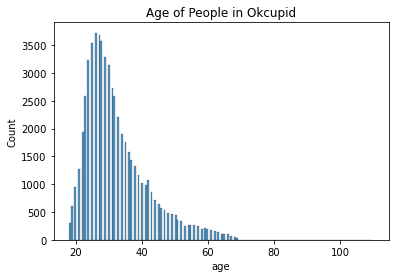

In [5]:
sns.histplot(df.age)
plt.title('Age of People in Okcupid')

### Status of Male and Female Based on age

Text(0.5, 1.0, 'Status of Male and Female Based on age')

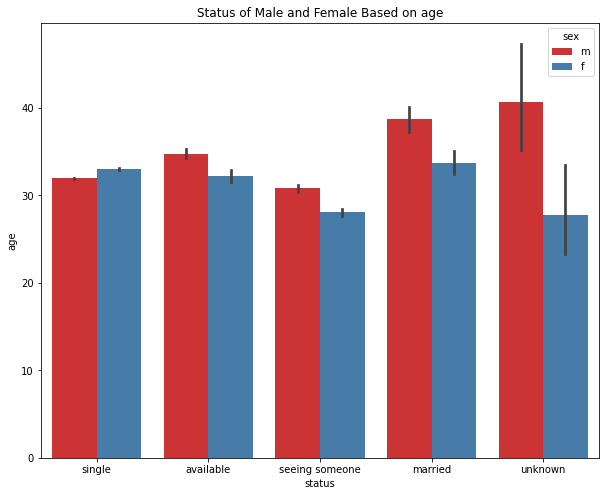

In [6]:
plt.figure(figsize=(10,8))
sns.set_palette('Set1')
sns.barplot(y='age',x='status',hue='sex',data=df)
plt.title('Status of Male and Female Based on age')

### Income

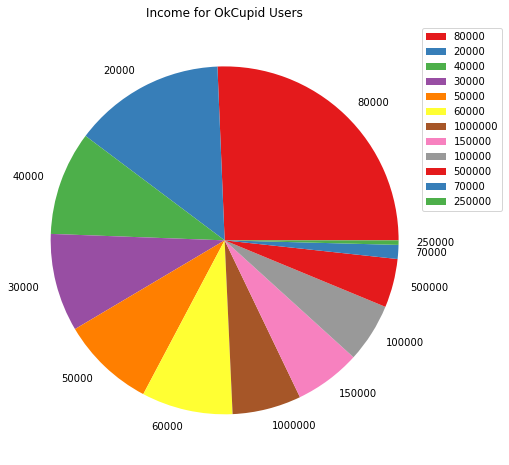

In [7]:
non_na_income_data = df['income'][df['income'] != -1]
plt.figure(figsize=(12,8))
plt.pie(non_na_income_data.value_counts(), labels=non_na_income_data.unique())
plt.title("Income for OkCupid Users")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

### Body Type

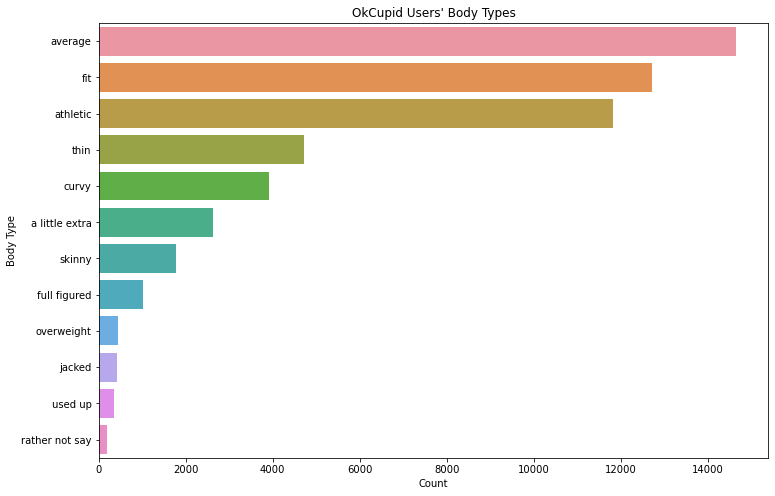

In [8]:
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.countplot(y='body_type', data=df, order=df['body_type'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Body Type")
plt.title("OkCupid Users' Body Types")
plt.show()

### Diet

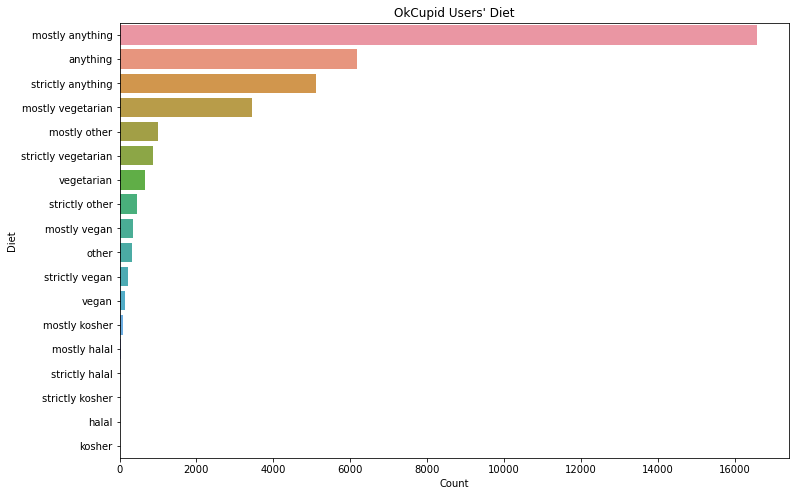

In [9]:
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.countplot(y='diet', data=df, order=df['diet'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Diet")
plt.title("OkCupid Users' Diet")
plt.show()

### Education

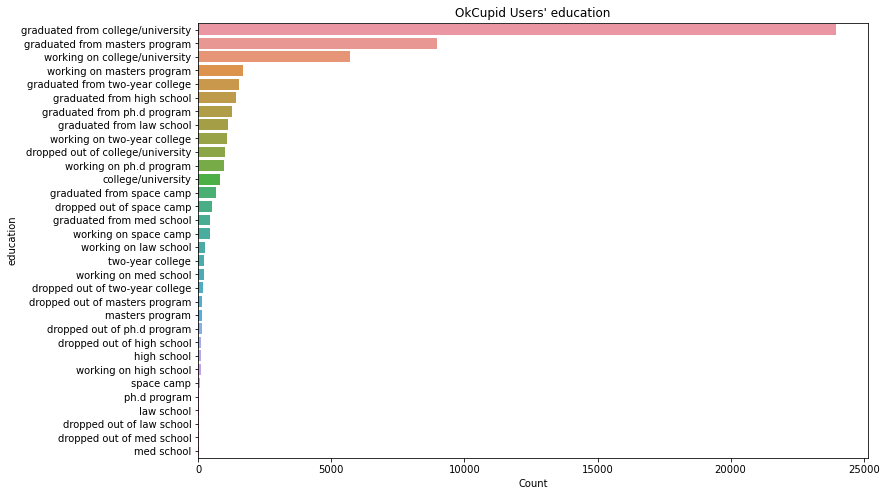

In [10]:
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("education")
plt.title("OkCupid Users' education")
plt.show()

 ###  Religion

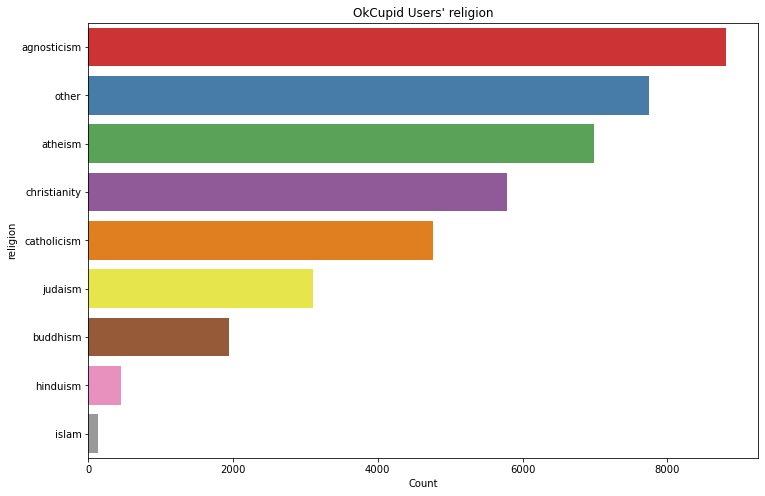

In [14]:
df.religion = df.religion.str.split().str.get(0)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.countplot(y='religion', data=df, order=df['religion'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("religion")
plt.title("OkCupid Users' religion")
plt.show()

### Sign

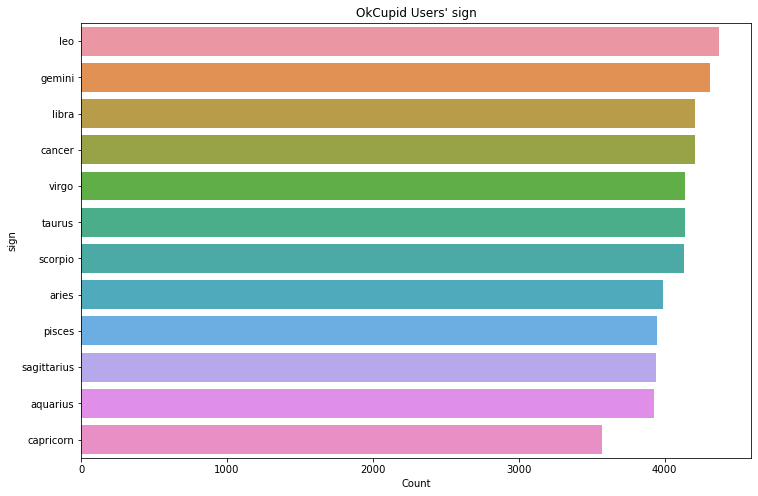

In [16]:
df.sign = df.sign.str.split().str.get(0)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.countplot(y='sign', data=df, order=df['sign'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("sign")
plt.title("OkCupid Users' sign")
plt.show()

### Smokes

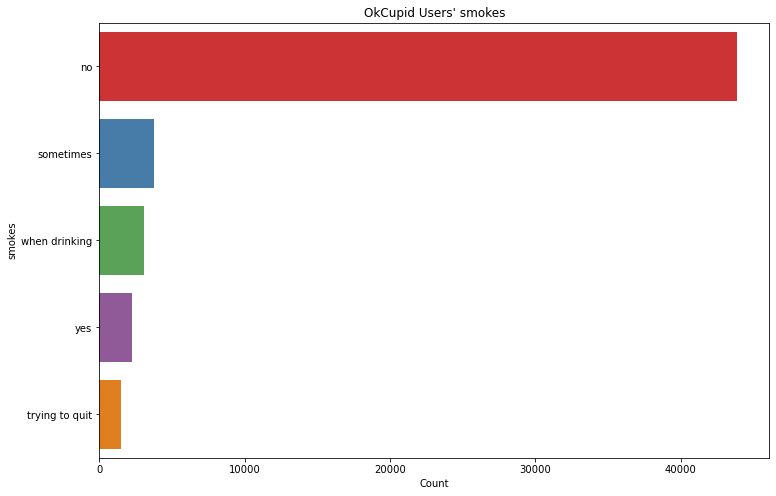

In [17]:

plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.countplot(y='smokes', data=df, order=df['smokes'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("smokes")
plt.title("OkCupid Users' smokes")
plt.show()

### Drinks

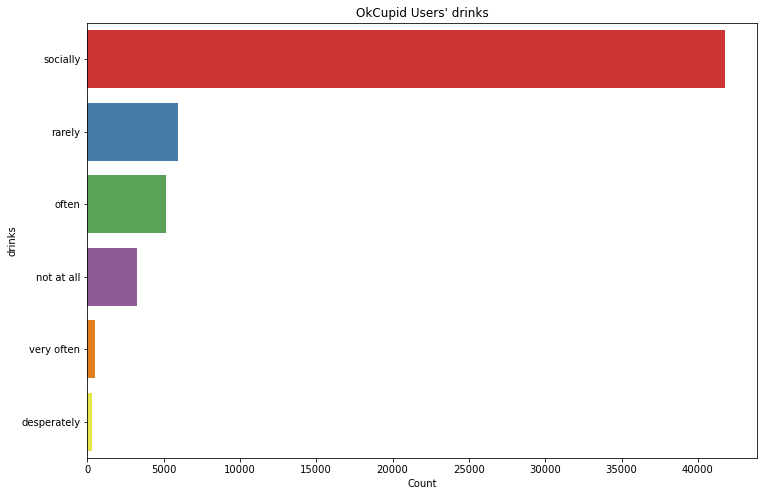

In [18]:
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.countplot(y='drinks', data=df, order=df['drinks'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("drinks")
plt.title("OkCupid Users' drinks")
plt.show()

###  Orientation

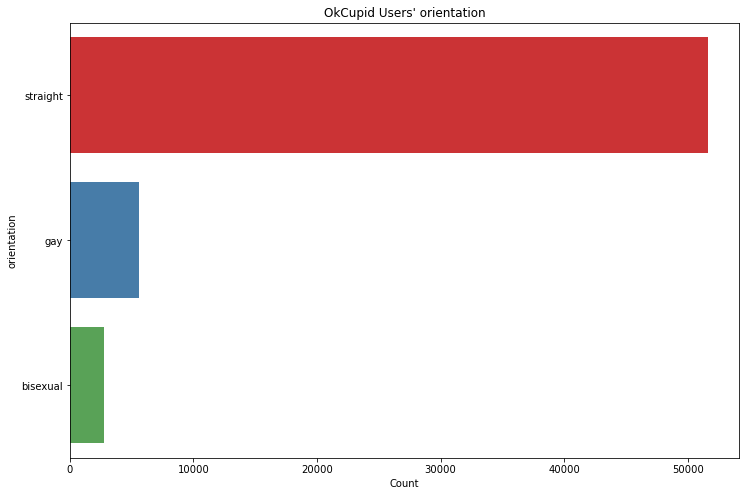

In [20]:
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.countplot(y='orientation', data=df, order=df['orientation'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("orientation")
plt.title("OkCupid Users' orientation")
plt.show()

# Data Processing

### Missing Value

In [94]:
df.isnull().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

In [95]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religion',
       'sex', 'job', 'sign']
new_df = df[cols].dropna()
new_df.shape

(16453, 8)

In [96]:
new_df.head()

,body_type,diet,orientation,pets,religion,sex,job,sign
0,a little extra,strictly anything,straight,likes dogs and likes cats,agnosticism,m,transportation,gemini
1,average,mostly other,straight,likes dogs and likes cats,agnosticism,m,hospitality / travel,cancer
5,average,mostly anything,straight,likes cats,atheism,m,computer / hardware / software,taurus
7,average,mostly anything,straight,likes dogs and likes cats,christianity,f,artistic / musical / writer,sagittarius
9,athletic,mostly anything,straight,likes dogs and likes cats,atheism,m,student,cancer


#### The code below transforms the categorical variables into binary data. Because the categorical format is not usable.

In [97]:
for i in col[:-1]:
    new_df = pd.get_dummies(data = new_df, columns = [i], prefix = [i])
new_df.head()    

,sign,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Splitting Data

In [106]:
#Y is the target column, X has the rest
X = new_df.iloc[:,1:len(new_df.columns)]
Y = new_df.iloc[:,0]
#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

# Making our Ml Model for predicting sign

#### For this project we will use  three common algorithms will be used to make predictions. Below, the respective modules for Logistic Regression, Decision Trees, and KNN are loaded.

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### Model 1

#### Logistic Regression Classifier

In [108]:
# The first model is using logistic regression with the multi_class="multinomial" argument
classifier1 =  LogisticRegression(multi_class="multinomial")
lr_model =classifier1.fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

C:\Users\vaibh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
print(f"Prediction : {lr_predictions}")
print(f"Score for training data : {lr_model.score(X_train, Y_train)}")
print(f"Score for test data : {lr_model.score(X_test, Y_test)}")

Prediction : ['aquarius' 'leo' 'virgo' ... 'pisces' 'leo' 'virgo']
Score for training data : 0.12042242820240084
Score for test data : 0.08447280461865694


In [112]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.05      0.07      1007
       aries       0.11      0.08      0.09      1050
      cancer       0.12      0.23      0.16      1196
   capricorn       0.11      0.03      0.05       966
      gemini       0.11      0.14      0.13      1181
         leo       0.12      0.18      0.14      1212
       libra       0.13      0.11      0.12      1087
      pisces       0.12      0.14      0.13      1080
 sagittarius       0.11      0.08      0.09      1049
     scorpio       0.13      0.06      0.08      1067
      taurus       0.11      0.10      0.11      1116
       virgo       0.13      0.21      0.16      1151

    accuracy                           0.12     13162
   macro avg       0.12      0.12      0.11     13162
weighted avg       0.12      0.12      0.11     13162



#### The scores obtained for our logistic regression model are low.

## Model2

#### K-Nearest_Neighbors Classifier

In [113]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [114]:
print(f"Score for training data : {knn_model.score(X_train, Y_train)}")
print(f"Score for test data : {knn_model.score(X_test, Y_test)}")

Score for training data : 0.3295091931317429
Score for test data : 0.08173807353388028


In [115]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.24      0.63      0.35      1007
       aries       0.28      0.55      0.37      1050
      cancer       0.29      0.43      0.35      1196
   capricorn       0.30      0.32      0.31       966
      gemini       0.37      0.33      0.34      1181
         leo       0.41      0.30      0.34      1212
       libra       0.41      0.26      0.32      1087
      pisces       0.39      0.25      0.30      1080
 sagittarius       0.44      0.21      0.28      1049
     scorpio       0.41      0.23      0.30      1067
      taurus       0.42      0.23      0.30      1116
       virgo       0.41      0.24      0.30      1151

    accuracy                           0.33     13162
   macro avg       0.36      0.33      0.32     13162
weighted avg       0.37      0.33      0.32     13162



#### The score obtained is better than Logostic Classifier but still very low .

## Model 3
### Decision Tree

In [122]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, Y_train) 
predictions = decision_tree_model.predict(X_train) 
print(f"Score training data : {decision_tree_model.score(X_train, Y_train)}")
print(f"Score test data : {decision_tree_model.score(X_test, Y_test)}")

Score training data : 0.7719191612216988
Score test data : 0.08082649650562139


In [123]:
print(classification_report(Y_train,predictions))

              precision    recall  f1-score   support

    aquarius       0.64      0.94      0.76      1007
       aries       0.67      0.89      0.76      1050
      cancer       0.69      0.87      0.77      1196
   capricorn       0.73      0.81      0.77       966
      gemini       0.77      0.79      0.78      1181
         leo       0.81      0.78      0.80      1212
       libra       0.80      0.75      0.78      1087
      pisces       0.81      0.73      0.76      1080
 sagittarius       0.87      0.68      0.76      1049
     scorpio       0.89      0.69      0.78      1067
      taurus       0.91      0.68      0.78      1116
       virgo       0.91      0.67      0.77      1151

    accuracy                           0.77     13162
   macro avg       0.79      0.77      0.77     13162
weighted avg       0.79      0.77      0.77     13162



1 0.08751139471285324
2 0.08447280461865694
3 0.07657247037374658
4 0.07748404740200547
5 0.07626861136432696
6 0.0850805226374962
7 0.08447280461865694
8 0.08386508659981769
9 0.08173807353388028
10 0.08751139471285324
11 0.08933454876937101
12 0.0881191127316925
13 0.08872683075053175
14 0.09206927985414767
15 0.08994226678821027
16 0.09054998480704952
17 0.08872683075053175
18 0.08872683075053175
19 0.08690367669401398
20 0.08568824065633546
21 0.08173807353388028
22 0.08021877848678213
23 0.08021877848678213
24 0.0829535095715588
25 0.07657247037374658
26 0.08021877848678213
27 0.0799149194773625
28 0.07900334244910362
29 0.07718018839258584
30 0.08052263749620177
31 0.0820419325432999
32 0.07718018839258584
33 0.07809176542084473
34 0.07596475235490732
35 0.07748404740200547
36 0.08173807353388028
37 0.07869948343968398
38 0.08234579155271954
39 0.07657247037374658
40 0.07869948343968398
41 0.0829535095715588
42 0.08447280461865694
43 0.08173807353388028
44 0.07778790641142509
45 

<AxesSubplot:>

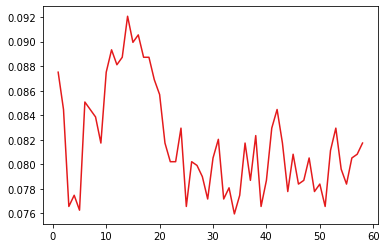

In [131]:
# Selecting best max Depth
# print(decision_tree_model.tree_.max_depth)
score = []
for i in range(1,59):
    decision_tree_model = DecisionTreeClassifier(max_depth = i)
    decision_tree_model.fit(X_train, Y_train) 
    score.append(decision_tree_model.score(X_test, Y_test))
    print(i,decision_tree_model.score(X_test, Y_test))
    
sns.lineplot(x=range(1,59),y=score)    

#### Decision trees have the best score but have the defect of over-fitting.

To fix this with the max depth changed to 30

In [134]:
decision_tree_model = DecisionTreeClassifier(max_depth=30)
decision_tree_model.fit(X_train, Y_train) 
predictions = decision_tree_model.predict(X_train) 
print(f"Score training data : {decision_tree_model.score(X_train, Y_train)}")
print(f"Score test data : {decision_tree_model.score(X_test, Y_test)}")
print(classification_report(Y_train,predictions))

Score training data : 0.5725573621030239
Score test data : 0.07961106046794288
              precision    recall  f1-score   support

    aquarius       0.59      0.66      0.62      1007
       aries       0.55      0.64      0.59      1050
      cancer       0.54      0.64      0.58      1196
   capricorn       0.67      0.57      0.61       966
      gemini       0.55      0.57      0.56      1181
         leo       0.50      0.62      0.55      1212
       libra       0.73      0.55      0.62      1087
      pisces       0.67      0.51      0.58      1080
 sagittarius       0.79      0.50      0.61      1049
     scorpio       0.61      0.53      0.57      1067
      taurus       0.69      0.51      0.59      1116
       virgo       0.37      0.58      0.45      1151

    accuracy                           0.57     13162
   macro avg       0.60      0.57      0.58     13162
weighted avg       0.60      0.57      0.58     13162



### The score is still bad, to compensate for this over-adjustment we will use random forests.

In [135]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 42)
forest.fit(X_train, Y_train)
prediction = forest.predict(X_train)
print(classification_report(Y_train, prediction))

              precision    recall  f1-score   support

    aquarius       0.80      0.77      0.79      1007
       aries       0.77      0.78      0.77      1050
      cancer       0.76      0.79      0.77      1196
   capricorn       0.77      0.75      0.76       966
      gemini       0.78      0.76      0.77      1181
         leo       0.79      0.80      0.79      1212
       libra       0.77      0.77      0.77      1087
      pisces       0.75      0.77      0.76      1080
 sagittarius       0.78      0.74      0.76      1049
     scorpio       0.79      0.76      0.78      1067
      taurus       0.80      0.77      0.78      1116
       virgo       0.73      0.79      0.76      1151

    accuracy                           0.77     13162
   macro avg       0.77      0.77      0.77     13162
weighted avg       0.77      0.77      0.77     13162



In [136]:
print(f"Score training data : {forest.score(X_train, Y_train)}")
print(f"Score test data : {forest.score(X_test, Y_test)}")

Score training data : 0.7719191612216988
Score test data : 0.08751139471285324


### Final model Resuls :
#### We will use decision trees, because they provide the best results.

# Conclusion

The aim of the project was to predict the astrological signs of OkCupid users. For this we used several machine learning models, but the one we chose was the decision tree because of its relatively better performance than the others. It is necessary to note that for my study i only used a few variables. The results might have been better if i had chosen other variables or adjusted our models to make them more efficient.